In [1]:
from floorplan import Box, Net, FloorPlan

import cvxpy as cp
from cvxpy import Variable, Constant, Minimize, Problem
import numpy as np
import placedb
import pylab
import math
import joblib

%load_ext autoreload
%autoreload 2

In [2]:
numCores = joblib.cpu_count()

In [3]:
design = "apte"
input_dir = "input/mcnc/"
blocksfile = "{}{}.block".format(input_dir,design)
netsfile = "{}{}.nets".format(input_dir,design) 
plfile = "{}{}.pl".format(input_dir,design)

In [4]:
pdb = placedb.PlaceDB()
p = placedb.Params()

In [5]:
pdb.read_block(p,blocksfile)
pdb.read_nets_mcnc(p,netsfile)
pdb.read_pl(p,plfile)
pdb.initialize(p)

/usr/local/lib/python3.8/site-packages/cvxpy/problems/problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


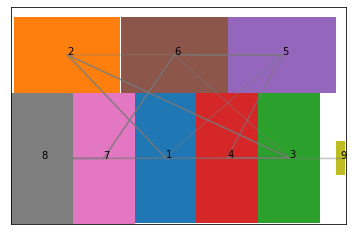

In [6]:
#%%time
n = pdb.num_movable_nodes

nets = []
for i, net in enumerate(pdb.net2pin_map):
    nodes = [pdb.pin2node_map[i] for i in net if pdb.pin2node_map[i] < n]
    if len(nodes) <= 1: continue
    nets.append(Net(nodes, i))
    
boxes = []
for i in range(n):
    boxes.append(Box(pdb.node_size_x[i], pdb.node_size_y[i], idx=i, r=True))

fp = FloorPlan(boxes, nets, pdb.xh, pdb.yh)
p, c = fp.layout()
fp.show()
violations = fp.verify_constraints(c)
assert np.all(violations <= 1e-5)

In [7]:
print(p/2)

149165.5
